# Homework #1

Remember: You must ingest the data to your notebooks directly from the data server. Also, don't write the same code with modifications to do similar things over and over again. Write a function.

## Question #1

For this question use the data [at this link](https://data.ibb.gov.tr/dataset/hourly-public-transport-data-set).

1. Calculate total hourly uses of different modes of transports (RAY, KARAYOLU, DENİZ) as pandas data frames for January 2021 and May 2021. Do you see any differences in usage patterns? Explain.
2. Calculate total hourly uses of different transfer types (AKTARMA, NORMAL) as pandas data frames for June 2020 and in September 2020.
3. Plot the results for step #1 and #2.
4. Calculate the daily totals for each line, and find out the busiest lines in each day of April 2020
5. Calculate the daily totals of passenger numbers and passage numbers, then calculate the daily ratios of passage numbers by passenger numbers for August 2020. What do the numbers tell you?


In [8]:
from urllib.request import urlopen

import  matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

import pandas as pd
import numpy as np
import math
from statistics import mean
import scipy.stats as stats
import urllib
from zipfile import ZipFile
from io import BytesIO

In [3]:
#1
raw_january = pd.read_csv('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/004994f5-3a50-4721-8787-41d4940bdaee/download/hourly_transportation_202101.csv')
raw_may = pd.read_csv('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/42b4a830-fee6-4765-9daf-3f3884f09b4b/download/hourly_transportation_202105.csv')
raw_months = {"january": raw_january, "may": raw_may}

In [4]:
# add_time() is a function that takes the TIME part of the DATE-TIME string, turns it into an integer and
# puts it into a new column called HOUR, so that we can use it easily in the further parts of our code.
def add_time(month):
    df = raw_months[month]
    df["HOUR"] = ""
    for i in range(len(df)):
        df["HOUR"][i] = int(df["DATE_TIME"][i][11:13])
    return df

In [5]:

january = add_time("january")
may = add_time("may")
months = {"january": january, "may": may}

C:\Users\Ecemnur Erman\AppData\Local\Temp\ipykernel_10048\180387226.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HOUR"][i] = int(df["DATE_TIME"][i][11:13])
C:\Users\Ecemnur Erman\AppData\Local\Temp\ipykernel_10048\180387226.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HOUR"][i] = int(df["DATE_TIME"][i][11:13])


In [6]:
# filter_by_means() is a function that filters the dataframe by transfer type description.
def filter_by_means(mean, month):
    df = months[month]
    return df[df.TRANSPORT_TYPE_DESC == mean]

# filter_by_hour() is a function that filters the dataframe by the hour.
def filter_by_hour(hour, df):
    return df[df.HOUR == hour]

# total_pass() is a function that sums the NUMBER_OF_PASSENGER column.
def total_pass(df):
    return df["NUMBER_OF_PASSENGER"].sum()

# monthly_sum() is a function that firstly creates a set named 'total', then filters the given variables 
# by transfer type description. after that, it filters them by hour and calculates the total of the passenger numbers.
# finally, it places the information in range of 24 (hours) as keys and the calculated values as values respectively 
# into the set 'total'.
def monthly_sum(mean, month):
    total = {}
    print(mean)
    print(month)
    for i in range(24):
        count = total_pass(filter_by_hour(i, filter_by_means(mean, month)))
        total.update({i:count})
    return total;

In [7]:
print(monthly_sum("RAY", "january"))
print(monthly_sum("DENİZ", "january"))
print(monthly_sum("KARAYOLU", "january"))
print(monthly_sum("RAY", "may"))
print(monthly_sum("DENİZ", "may"))
print(monthly_sum("KARAYOLU", "may"))

RAY
january
{0: 8450, 1: 1005, 2: 840, 3: 624, 4: 992, 5: 78582, 6: 724509, 7: 2029193, 8: 2561421, 9: 1770417, 10: 1267852, 11: 1222209, 12: 1337004, 13: 1432332, 14: 1585165, 15: 1685689, 16: 2085219, 17: 2637099, 18: 3233220, 19: 2404482, 20: 1299408, 21: 330381, 22: 165771, 23: 89516}
DENİZ
january
{0: 145, 1: 87, 2: 85, 3: 92, 4: 378, 5: 2085, 6: 30359, 7: 111333, 8: 132216, 9: 105872, 10: 85078, 11: 90846, 12: 105170, 13: 114566, 14: 125633, 15: 142087, 16: 173069, 17: 203677, 18: 191929, 19: 100778, 20: 37893, 21: 7041, 22: 2028, 23: 1326}
KARAYOLU
january
{0: 22597, 1: 5912, 2: 3226, 3: 2889, 4: 9329, 5: 295514, 6: 2015264, 7: 4470111, 8: 4540180, 9: 3032496, 10: 2034087, 11: 1850676, 12: 1963586, 13: 2076332, 14: 2274125, 15: 2432277, 16: 3033506, 17: 3727758, 18: 4179208, 19: 3426396, 20: 2216574, 21: 654983, 22: 261078, 23: 107228}
RAY
may
{0: 87, 1: 59, 2: 38, 3: 35, 4: 89, 5: 4739, 6: 39731, 7: 82916, 8: 76179, 9: 49494, 10: 33857, 11: 30640, 12: 33921, 13: 41283, 14: 4311

In [8]:
# plotter() is a function that plots the given data frame.
def plotter(transf_bymonth):
    myList = transf_bymonth.items()
    myList = sorted(myList)
    x, y = zip(*myList)
    return plt.plot(x,y)

DENİZ
january
RAY
january
KARAYOLU
january


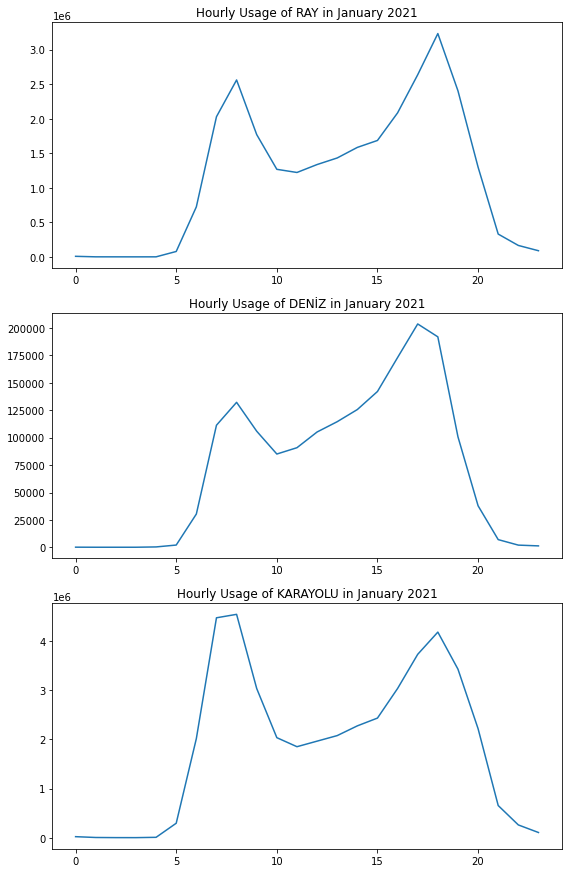

In [9]:
deniz_jan = monthly_sum("DENİZ", "january")
ray_jan = monthly_sum("RAY", "january")
karayolu_jan = monthly_sum("KARAYOLU", "january") 
plt.rcParams["figure.figsize"] = (8,12)
plt.subplot(3, 1, 1)
plt.title("Hourly Usage of RAY in January 2021")
plotter(ray_jan)
plt.tight_layout()
plt.subplot(3, 1, 2)
plt.title('Hourly Usage of DENİZ in January 2021')
plotter(deniz_jan)
plt.tight_layout()
plt.subplot(3, 1, 3)
plt.title('Hourly Usage of KARAYOLU in January 2021')
plotter(karayolu_jan)

DENİZ
may
RAY
may
KARAYOLU
may


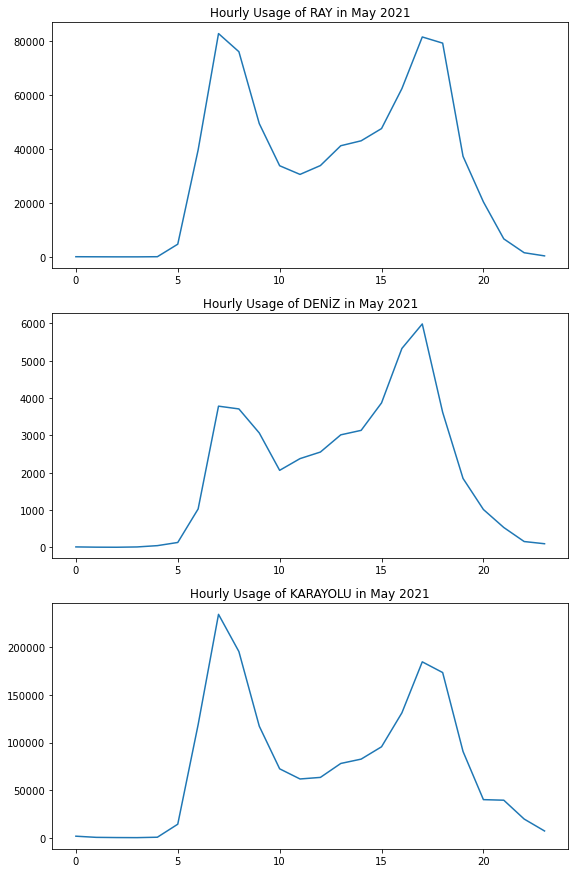

In [10]:
deniz_may = monthly_sum("DENİZ", "may")
ray_may = monthly_sum("RAY", "may")
karayolu_may = monthly_sum("KARAYOLU", "may")
plt.subplot(3, 1, 1)
plt.title('Hourly Usage of RAY in May 2021')
plotter(ray_may)
plt.tight_layout()
plt.subplot(3, 1, 2)
plt.title('Hourly Usage of DENİZ in May 2021')
plotter(deniz_may)
plt.tight_layout()
plt.subplot(3, 1, 3)
plt.title('Hourly Usage of KARAYOLU in May 2021')
plotter(karayolu_may)

In [11]:
# despite the different numbers being given for each data frame, we can clearly see that there is an apparent pattern 
# when it comes to people's hourly usage of public transportation in relation to time. according to the plotted graphs,
# rush hours are the times when each type of public transportation reaches its relative peak, whereas night hours (approx. 
# from 8 p.m. until 5 a.m.) are the times when the usage of public transportation reaches its relative bottom.

In [12]:
#2
raw_june2020 = pd.read_csv('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/4f1c434d-bd1f-4937-b88f-6e2df1a85dc5/download/hourly_transportation_202006.csv')
raw_sept2020 = pd.read_csv('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/5b3b12b7-575d-4b55-b497-62e3b544edb0/download/hourly_transportation_202009.csv')
raw_months_2020 = {"june": raw_june2020, "sept": raw_sept2020}

In [13]:
# add_time_2020() is a function that takes the TIME part of the DATE-TIME string, turns it into an integer and
# puts it into a new column called HOUR, so that we can use it easily in the further parts of our code.
def add_time_2020(month):
    df = raw_months_2020[month]
    df["HOUR"] = ""
    for i in range(len(df)):
        df["HOUR"][i] = int(df["DATE_TIME"][i][11:13])
    return df

In [15]:

june = add_time_2020("june")
sept = add_time_2020("sept")
months_2020 = {"june": june, "sept": sept}

C:\Users\Ecemnur Erman\AppData\Local\Temp\ipykernel_10048\505019375.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HOUR"][i] = int(df["DATE_TIME"][i][11:13])
C:\Users\Ecemnur Erman\AppData\Local\Temp\ipykernel_10048\505019375.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HOUR"][i] = int(df["DATE_TIME"][i][11:13])


In [16]:
# filter_by_transfer() is a function that filters the dataframe by transfer type.
def filter_by_transfer(transf, month):
    df = months_2020[month]
    return df[df.TRANSFER_TYPE == transf]

# monthly_sum_2020() is a function that firstly creates a set named 'total_transfer', then filters the given variables 
# by transfer type. after that, it filters them by hour and calculates the total of the passenger numbers.
# finally, it places the information in range of 24 (hours) as keys and the calculated values as values respectively 
# into the set 'total_transfer'.
def monthly_sum_2020(transf, month):
    total_transfer = {}
    print(transf)
    print(month)
    for i in range(24):
        count = total_pass(filter_by_hour(i, filter_by_transfer(transf, month)))
        total_transfer.update({i:count})
    return total_transfer;

In [17]:
print(monthly_sum_2020("AKTARMA", "june"))
print(monthly_sum_2020("NORMAL", "june"))
print(monthly_sum_2020("AKTARMA", "sept"))
print(monthly_sum_2020("NORMAL", "sept"))

AKTARMA
june
{0: 11823, 1: 133, 2: 1, 3: 0, 4: 11, 5: 4933, 6: 179819, 7: 538744, 8: 706835, 9: 623922, 10: 592951, 11: 628314, 12: 643617, 13: 690366, 14: 762234, 15: 811606, 16: 813135, 17: 839167, 18: 913768, 19: 835717, 20: 612774, 21: 415075, 22: 282750, 23: 130665}
NORMAL
june
{0: 150355, 1: 34213, 2: 14752, 3: 9123, 4: 13614, 5: 362206, 6: 2633377, 7: 5791437, 8: 5762988, 9: 3671724, 10: 2975091, 11: 2935266, 12: 3044991, 13: 3282567, 14: 3522323, 15: 3825496, 16: 4222818, 17: 5437893, 18: 6288631, 19: 5094871, 20: 3433638, 21: 2342703, 22: 1674166, 23: 766942}
AKTARMA
sept
{0: 19104, 1: 214, 2: 36, 3: 28, 4: 26, 5: 5820, 6: 186911, 7: 627312, 8: 896402, 9: 798011, 10: 773068, 11: 836222, 12: 907995, 13: 998688, 14: 1118500, 15: 1161270, 16: 1121018, 17: 1156014, 18: 1255783, 19: 1154679, 20: 805283, 21: 504194, 22: 345314, 23: 183830}
NORMAL
sept
{0: 248258, 1: 65694, 2: 34857, 3: 19972, 4: 28127, 5: 430161, 6: 3313527, 7: 7854819, 8: 8186398, 9: 5162148, 10: 4093676, 11: 41559

AKTARMA
june
NORMAL
june
AKTARMA
sept
NORMAL
sept


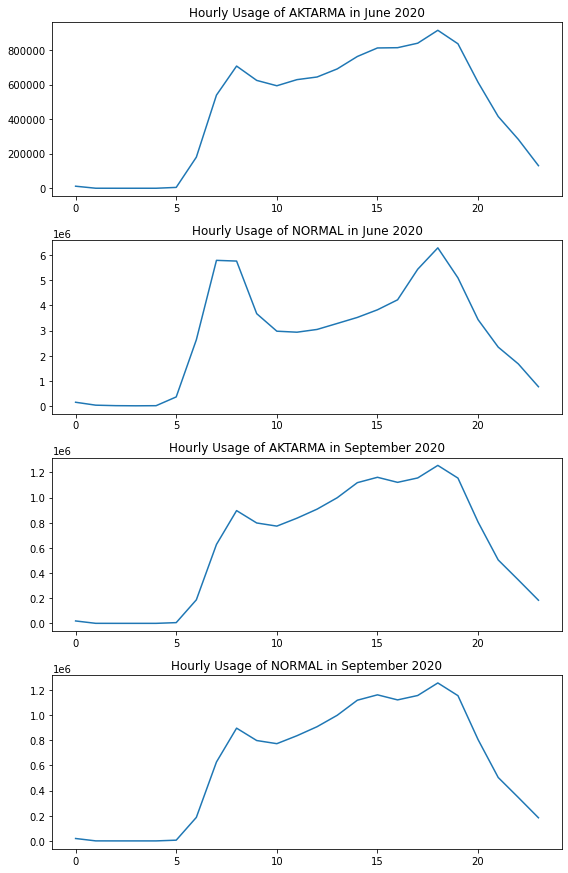

In [18]:
aktarma_june = monthly_sum_2020("AKTARMA", "june")
normal_june = monthly_sum_2020("NORMAL", "june")
aktarma_sept = monthly_sum_2020("AKTARMA", "sept")
normal_sept = monthly_sum_2020("NORMAL", "sept")
plt.subplot(4, 1, 1)
plt.title('Hourly Usage of AKTARMA in June 2020')
plotter(aktarma_june)
plt.tight_layout()
plt.subplot(4, 1, 2)
plt.title('Hourly Usage of NORMAL in June 2020')
plotter(normal_june)
plt.tight_layout()
plt.subplot(4, 1, 3)
plt.title('Hourly Usage of AKTARMA in September 2020')
plotter(aktarma_sept)
plt.tight_layout()
plt.subplot(4, 1, 4)
plt.title('Hourly Usage of NORMAL in September 2020')
plotter(aktarma_sept)

In [19]:
#4
raw_april2020 = pd.read_csv('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/75e25417-36df-4822-8a18-578f0f7a584a/download/hourly_transportation_202004.csv')
raw_august2020 = pd.read_csv('https://data.ibb.gov.tr/dataset/a6855ce7-4092-40a5-82b5-34cf3c7e36e3/resource/a195a42f-727a-4f1e-ad55-471306788c99/download/hourly_transportation_202008.csv')
raw_months_2020 = {"april": raw_april2020, "august": raw_august2020}

In [20]:
# add_date_2020() is a function that takes the DATE part from the DATE-TIME string and assigns it to the new column named DATE.
def add_date_2020(month):
    df = raw_months_2020[month]
    df["DATE"] = ""
    for i in range(len(df)):
        df["DATE"][i] = df["DATE_TIME"][i][0:11]
    return df

In [21]:

april2020 = add_date_2020("april")
august2020 = add_date_2020("august")
months_2020 = {"april": april2020, "august": august2020}

C:\Users\Ecemnur Erman\AppData\Local\Temp\ipykernel_10048\2247338826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DATE"][i] = df["DATE_TIME"][i][0:11]
C:\Users\Ecemnur Erman\AppData\Local\Temp\ipykernel_10048\2247338826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DATE"][i] = df["DATE_TIME"][i][0:11]


In [22]:
overall_april2020 = april2020[['DATE', 'LINE', 'NUMBER_OF_PASSENGER']].groupby(['DATE', 'LINE']).sum()
overall_april2020

NUMBER_OF_PASSENGER
DATE        LINE                                          
2020-04-01  AKSARAY-HAVALİMANI                       62308
            EDİRNEKAPI-SULTANÇİFTLİĞİ                35099
            KABATAŞ-BAĞCILAR                         46421
            KADIKÖY-KARTAL METROSU                   24436
            KADIKÖY-MODA                               124
...                                                    ...
2020-04-30  ÖHO                                     414726
            ÜSKÜDAR ÇEKMEKÖY METROSU                 26228
            İETT                                    218113
            İETT TÜNEL                                 961
            ŞEHİR HATLARI                            13020

[466 rows x 1 columns]

In [23]:
date_and_station = dict(overall_april2020['NUMBER_OF_PASSENGER'])
date_and_station =list(date_and_station.items())
date_and_station = [(item[0][0], (item[0][1], item[1])) for item in date_and_station]
dates = set([item[0] for item in date_and_station])
date_and_station

[('2020-04-01 ', ('AKSARAY-HAVALİMANI', 62308)),
 ('2020-04-01 ', ('EDİRNEKAPI-SULTANÇİFTLİĞİ', 35099)),
 ('2020-04-01 ', ('KABATAŞ-BAĞCILAR', 46421)),
 ('2020-04-01 ', ('KADIKÖY-KARTAL METROSU', 24436)),
 ('2020-04-01 ', ('KADIKÖY-MODA', 124)),
 ('2020-04-01 ', ('KİRAZLI-OLİMPİYATKÖY', 14614)),
 ('2020-04-01 ', ('LEVENT - RUMELİ HİSARÜSTÜ', 1115)),
 ('2020-04-01 ', ('MARMARAY', 49819)),
 ('2020-04-01 ', ('METROBÜS', 118950)),
 ('2020-04-01 ', ('MOTOR TEKNE', 9631)),
 ('2020-04-01 ', ('TAKSİM-4.LEVENT', 39829)),
 ('2020-04-01 ', ('TAKSİM-KABATAŞ FUNİKULERİ', 399)),
 ('2020-04-01 ', ('ÖHO', 350599)),
 ('2020-04-01 ', ('ÜSKÜDAR ÇEKMEKÖY METROSU', 24911)),
 ('2020-04-01 ', ('İETT', 165957)),
 ('2020-04-01 ', ('İETT NOSTALJİK TRAMVAY', 25)),
 ('2020-04-01 ', ('İETT TÜNEL', 555)),
 ('2020-04-01 ', ('ŞEHİR HATLARI', 8368)),
 ('2020-04-02 ', ('AKSARAY-HAVALİMANI', 56837)),
 ('2020-04-02 ', ('EDİRNEKAPI-SULTANÇİFTLİĞİ', 31928)),
 ('2020-04-02 ', ('KABATAŞ-BAĞCILAR', 41929)),
 ('2020-04-02 ', (

In [24]:
# npass() is a function that returns the result to the second element of the given list.
def npass(item):
    return item[1]

pass_dict ={}
for date in dates:
    pass_list = []
    for item in date_and_station:
        if item[0] == date:
            pass_list.append(item[1])
            pass_list.sort(reverse = True, key = npass)
            busiest = pass_list[0]  
    pass_dict.update({date: busiest})

pass_dict  

{'2020-04-03 ': ('ÖHO', 341859),
 '2020-04-05 ': ('ÖHO', 161687),
 '2020-04-27 ': ('ÖHO', 421725),
 '2020-04-12 ': ('İETT', 15959),
 '2020-04-07 ': ('ÖHO', 321206),
 '2020-04-02 ': ('ÖHO', 326565),
 '2020-04-14 ': ('ÖHO', 341491),
 '2020-04-21 ': ('ÖHO', 388312),
 '2020-04-19 ': ('İETT', 21932),
 '2020-04-06 ': ('ÖHO', 326333),
 '2020-04-09 ': ('ÖHO', 320074),
 '2020-04-23 ': ('İETT', 67310),
 '2020-04-26 ': ('İETT', 31878),
 '2020-04-17 ': ('ÖHO', 374972),
 '2020-04-11 ': ('İETT', 19713),
 '2020-04-16 ': ('ÖHO', 352374),
 '2020-04-08 ': ('ÖHO', 319022),
 '2020-04-10 ': ('ÖHO', 337263),
 '2020-04-20 ': ('ÖHO', 400725),
 '2020-04-30 ': ('ÖHO', 414726),
 '2020-04-01 ': ('ÖHO', 350599),
 '2020-04-28 ': ('ÖHO', 388523),
 '2020-04-18 ': ('İETT', 25278),
 '2020-04-22 ': ('ÖHO', 411023),
 '2020-04-25 ': ('İETT', 37750),
 '2020-04-13 ': ('ÖHO', 357637),
 '2020-04-29 ': ('ÖHO', 393924),
 '2020-04-04 ': ('ÖHO', 254928),
 '2020-04-24 ': ('İETT', 71690),
 '2020-04-15 ': ('ÖHO', 321957)}

In [25]:
#5
overall_august2020 = august2020[['DATE', 'NUMBER_OF_PASSENGER', 'NUMBER_OF_PASSAGE']].groupby(['DATE']).sum()
overall_august2020

,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE
DATE,,
2020-08-01,3175625,3864568
2020-08-02,3353801,4051211
2020-08-03,3326812,3902550
2020-08-04,3388301,3645945
2020-08-05,3490563,3743044
2020-08-06,3495338,3742428
2020-08-07,3520707,3770262
2020-08-08,2984185,3240121
2020-08-09,2304881,2558633


In [26]:
overall_august2020["RATIO (PASS./PASSENG.)"] = overall_august2020["NUMBER_OF_PASSAGE"].div(overall_august2020["NUMBER_OF_PASSENGER"])
overall_august2020

,NUMBER_OF_PASSENGER,NUMBER_OF_PASSAGE,RATIO (PASS./PASSENG.)
DATE,,,
2020-08-01,3175625,3864568,1.216947
2020-08-02,3353801,4051211,1.207946
2020-08-03,3326812,3902550,1.173060
2020-08-04,3388301,3645945,1.076039
2020-08-05,3490563,3743044,1.072332
2020-08-06,3495338,3742428,1.070691
2020-08-07,3520707,3770262,1.070882
2020-08-08,2984185,3240121,1.085764
2020-08-09,2304881,2558633,1.110093


In [ ]:
# from the first day of august 2020 as the highest passage/passenger ratio, the ratios get lower as 
# the days pass with a few exceptions. we can also say that people were tend to travel more (as in 
# passing through the transportations more) on the first three days, as the difference between passage
# numbers and the passennger numbers are a lot higher than the rest of august. 

## Question #2

For this question use the data [at this link](https://alaska.usgs.gov/products/data.php?dataid=522). This dataset contains isotope values of muscle tissue from fish collected in the nearshore Beaufort Sea, Alaska in summers 2017-2019.

1. Calculate the average lengths of fish sampled at each location in the years 2017, 2018 and 2019.
2. Can you statistically observe any differences in lengths between the years 2018 and 2019?
3. Calculate the average concentration of C13 and N15 for the samples collected at each location in the years 2017, 2018 and 2019.
4. Can you statistically observe any differences in C13 and N15 concentrations between the years 2018 and 2019?
5. Can we do the same comparisons for the year 2017 against 2018 or 2019? Why doesn't this work? What should we do to make these comparisons to work?

In [9]:
#1
with urlopen('https://alaska.usgs.gov/data/aquaticEcology/fish/fish_stableIsotopes_beaufort_stanek/fish_stableIsotopes_beaufort_stanek.zip') as url:
        zf = ZipFile(BytesIO(url.read()))
        df = pd.read_csv(zf.open('fish_stableIsotopes_beaufort_stanek.csv'))
                         
df

,FishID,CommonName,Date,Region,Location,Latitude,Longitude,mmLength,d13C,d15N,CtoN
0,ARCI005,Arctic Cisco,2018-08-11,eastern,Kaktovik Lagoon,70.0907,-143.6593,323.0,-22.37,14.45,3.88
1,ARCI014,Arctic Cisco,2018-08-12,eastern,Kaktovik Lagoon,70.0907,-143.6593,128.0,-25.68,8.55,4.16
2,ARCI021,Arctic Cisco,2017-08-06,eastern,Kaktovik Lagoon,70.0907,-143.6593,48.0,-25.75,9.78,4.61
3,ARCI038,Arctic Cisco,2017-08-05,eastern,Kaktovik Lagoon,70.0907,-143.6593,57.0,-25.61,9.69,5.90
4,ARCI040,Arctic Cisco,2017-08-09,eastern,Kaktovik Lagoon,70.0907,-143.6593,79.0,-24.88,10.04,4.01
...,...,...,...,...,...,...,...,...,...,...,...
787,THST009,Threespine Stickleback,2019-07-22,central,Simpson Lagoon,70.5156,-149.4676,82.0,-20.51,12.93,3.88
788,THST010,Threespine Stickleback,2019-07-22,central,Simpson Lagoon,70.5156,-149.4676,78.0,-19.99,14.16,3.98
789,THST011,Threespine Stickleback,2019-07-28,central,Simpson Lagoon,70.4986,-149.5987,74.0,-20.23,13.63,3.79
790,THST012,Threespine Stickleback,2019-07-28,central,Simpson Lagoon,70.4986,-149.5987,82.0,-20.21,14.04,4.02


In [10]:
# add_date_fish() is a function that takes the year part from the Date string and assigns it to the new column named YEAR.
def add_date_fish(df):
    df["YEAR"] = ""
    for i in range(len(df)):
        df.Date[i] = str(df.Date[i])
        df["YEAR"][i] = df["Date"][i][0:4]
    return df

In [11]:

fishdata_by_year = add_date_fish(df).drop(columns = ['Region', 'Latitude', 'Longitude', 'Date'])
fishdata_by_year

C:\Users\Ecemnur Erman\AppData\Local\Temp\ipykernel_10832\4288871129.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Date[i] = str(df.Date[i])
C:\Users\Ecemnur Erman\AppData\Local\Temp\ipykernel_10832\4288871129.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["YEAR"][i] = df["Date"][i][0:4]


,FishID,CommonName,Location,mmLength,d13C,d15N,CtoN,YEAR
0,ARCI005,Arctic Cisco,Kaktovik Lagoon,323.0,-22.37,14.45,3.88,2018
1,ARCI014,Arctic Cisco,Kaktovik Lagoon,128.0,-25.68,8.55,4.16,2018
2,ARCI021,Arctic Cisco,Kaktovik Lagoon,48.0,-25.75,9.78,4.61,2017
3,ARCI038,Arctic Cisco,Kaktovik Lagoon,57.0,-25.61,9.69,5.90,2017
4,ARCI040,Arctic Cisco,Kaktovik Lagoon,79.0,-24.88,10.04,4.01,2017
...,...,...,...,...,...,...,...,...
787,THST009,Threespine Stickleback,Simpson Lagoon,82.0,-20.51,12.93,3.88,2019
788,THST010,Threespine Stickleback,Simpson Lagoon,78.0,-19.99,14.16,3.98,2019
789,THST011,Threespine Stickleback,Simpson Lagoon,74.0,-20.23,13.63,3.79,2019
790,THST012,Threespine Stickleback,Simpson Lagoon,82.0,-20.21,14.04,4.02,2019


In [12]:
# av_len() is a function that firstly creates a new column called 'average_mmLength' and it assigns a value named 'result'
# to the element of the respectively given keys and takes the mean value of the rows that belong to 'mmLength' column.  
def av_len(df, fish, location, year):
    df["average_mmLength"] = ""
    result = df[df["CommonName"] == fish]
    result = result[result["Location"] == location]
    result = result[result["YEAR"] == year]
    mean_byfish = result["mmLength"].mean()
# the part below was necessary for our function, since there were 'nan' values in the data frame and it 
# somehow gave us nan values for non-given year data. to prevent it, we returned the non-nan values for the given
# if not condition. 
    if not math.isnan(mean_byfish):
        return {(fish,location,year): mean_byfish}

In [13]:
allfish= []
for name in set(fishdata_by_year.CommonName):
    for loc in set(fishdata_by_year.Location):
        for year in set(fishdata_by_year.YEAR):
# the part below was also necessary for our for-loop, as there were 'nan' values for year data in the data frame 
# and it somehow gave us nan values for non-given year data. to prevent it, we gave an if condition for the non-nan 
# valued years for the for-loop. 
            if (year != "nan"):
                allfish.append(av_len(fishdata_by_year, name, loc, year))

In [14]:
allfish = [item for item in allfish if item]
allfish

[{('Chum Salmon', 'Jago Lagoon', '2017'): 585.0},
 {('Chum Salmon', 'Kaktovik Lagoon', '2019'): 598.0},
 {('Chum Salmon', 'Kaktovik Lagoon', '2017'): 585.0},
 {('Ninespine Stickleback', 'Jago Lagoon', '2019'): 66.0},
 {('Ninespine Stickleback', 'Jago Lagoon', '2017'): 66.0},
 {('Ninespine Stickleback', 'Jago Lagoon', '2018'): 58.0},
 {('Ninespine Stickleback', 'Simpson Lagoon', '2019'): 59.0},
 {('Ninespine Stickleback', 'Kaktovik Lagoon', '2017'): 68.0},
 {('Threespine Stickleback', 'Jago Lagoon', '2019'): 77.0},
 {('Threespine Stickleback', 'Stefansson Sound', '2019'): 81.0},
 {('Threespine Stickleback', 'Simpson Lagoon', '2019'): 78.18181818181819},
 {('Broad Whitefish', 'Jago Lagoon', '2019'): 337.8},
 {('Broad Whitefish', 'Jago Lagoon', '2018'): 332.2},
 {('Broad Whitefish', 'Stefansson Sound', '2019'): 282.4},
 {('Broad Whitefish', 'Stefansson Sound', '2018'): 233.6},
 {('Broad Whitefish', 'Simpson Lagoon', '2019'): 272.25},
 {('Broad Whitefish', 'Simpson Lagoon', '2018'): 226.8}

In [15]:
def av_concentr(df, location, year):
    df["average_concentration"] = ""
    result = df[df["Location"] == location]
    result = result[result["YEAR"] == year]
    concentr_mean_byfish = result["CtoN"].dropna()
    concentr_mean_byfish = [float(item) for item in concentr_mean_byfish if item != "   NA"]
    try:
        concentr_mean_byfish = mean(concentr_mean_byfish)
    except:
        concentr_mean_byfish = 0
    return {(location, year): concentr_mean_byfish}

In [16]:
av_concentr(fishdata_by_year, "Stefansson Sound", "2018")
# this very data has the CtoN value 'NA', which causes a problem in the function

{('Stefansson Sound', '2018'): 3.9187603305785124}

In [19]:
CtoN_concentr= []
for loc in set(fishdata_by_year.Location):
    for year in set(fishdata_by_year.YEAR):
        if not type(fishdata_by_year.CtoN) == str:
            CtoN_concentr.append(av_concentr(fishdata_by_year, loc, year))

            
CtoN_concentr

[{('Jago Lagoon', '2019'): 4.075272727272727},
 {('Jago Lagoon', '2017'): 4.405285714285714},
 {('Jago Lagoon', 'nan'): 0},
 {('Jago Lagoon', '2018'): 3.9124166666666667},
 {('Stefansson Sound', '2019'): 4.033857142857143},
 {('Stefansson Sound', '2017'): 0},
 {('Stefansson Sound', 'nan'): 3.97},
 {('Stefansson Sound', '2018'): 3.9187603305785124},
 {('Simpson Lagoon', '2019'): 3.9448235294117646},
 {('Simpson Lagoon', '2017'): 0},
 {('Simpson Lagoon', 'nan'): 0},
 {('Simpson Lagoon', '2018'): 3.8021951219512196},
 {('Kaktovik Lagoon', '2019'): 3.9236363636363634},
 {('Kaktovik Lagoon', '2017'): 3.9663636363636363},
 {('Kaktovik Lagoon', 'nan'): 0},
 {('Kaktovik Lagoon', '2018'): 3.8447727272727272}]

In [ ]:
# since there are missing datas for 2017, we cannot make the comparison for the year 2017 against 2018 and 2019. 
# if the respective datas would have been given, we could have made a comparison, as the numeric differences would have been
# clearer in the 'CtoN_concentr' list.